In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

import dython
from dython.nominal import associations

# Define Problems :
- Sering kali produktivitas dari perusahaan terganggu dikarenakan banyaknya Karyawan yang Absen/Tidak masuk kerja dan cenderung membuat performa perusahaan menurun. Maka perusahaan akan mengalami kerugian dikarenakan hal tersebut, sehingga perlu diantisipasi agar mengurangi kecenderungan Karyawan melakukan Absen/Tidak masuk kerja untuk Alasan yang sebenarnya masih bisa ditoleransi.

# Goals :
- Membuat model untuk memprediksi Alasan Karyawan yang ingin Absen/Tidak masuk kerja.
- Dengan mengetahui hal tersebut, sehingga dikemudian hari jika ada karyawan yang melakukan Absen/Tidak masuk kerja untuk Alasan yang sebenarnya masih bisa ditoleransi, perusahaan dapat melakukan penanganan terhadap karyawan tersebut.

In [3]:
df = pd.read_csv('Absenteeism.csv', delimiter=";")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

# Mengubah Isi Kolom sesuai dengan Panduan Attribute Information

In [5]:
df['Day of the week'] = df['Day of the week'].replace({2 : "Monday", 3 : "Tuesday", 4 : "Wednesday", 5 : "Thursday", 6 : "Friday"})

In [6]:
df['Seasons'] = df['Seasons'].replace({1 : "Fall", 2 : "Spring", 3 : "Summer", 4 : "Winter"})

In [7]:
df['Disciplinary failure'] = df['Disciplinary failure'].replace({1 : "Yes", 0 : "No"})

In [8]:
df['Education'] = df['Education'].replace({1 : "High School", 2 : "Graduate", 3 : "PostGraduate", 4 : "Master and Doctor"})

In [9]:
df['Social drinker'] = df['Social drinker'].replace({1 : "Yes", 0 : "No"})

In [10]:
df['Social smoker'] = df['Social smoker'].replace({1 : "Yes", 0 : "No"})

# Deskripsi Kolom

In [11]:
desc = []

for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].isna().sum()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = desc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,ID,int64,0,0.0,36,"[35, 32]"
1,Reason for absence,int64,0,0.0,28,"[2, 9]"
2,Month of absence,int64,0,0.0,13,"[2, 6]"
3,Day of the week,object,0,0.0,5,"[Tuesday, Monday]"
4,Seasons,object,0,0.0,4,"[Spring, Summer]"
5,Transportation expense,int64,0,0.0,24,"[279, 118]"
6,Distance from Residence to Work,int64,0,0.0,25,"[14, 49]"
7,Service time,int64,0,0.0,18,"[4, 11]"
8,Age,int64,0,0.0,22,"[30, 50]"
9,Work load Average/day,float64,0,0.0,38,"[294.217, 280.54900000000004]"


# Handling Outliers

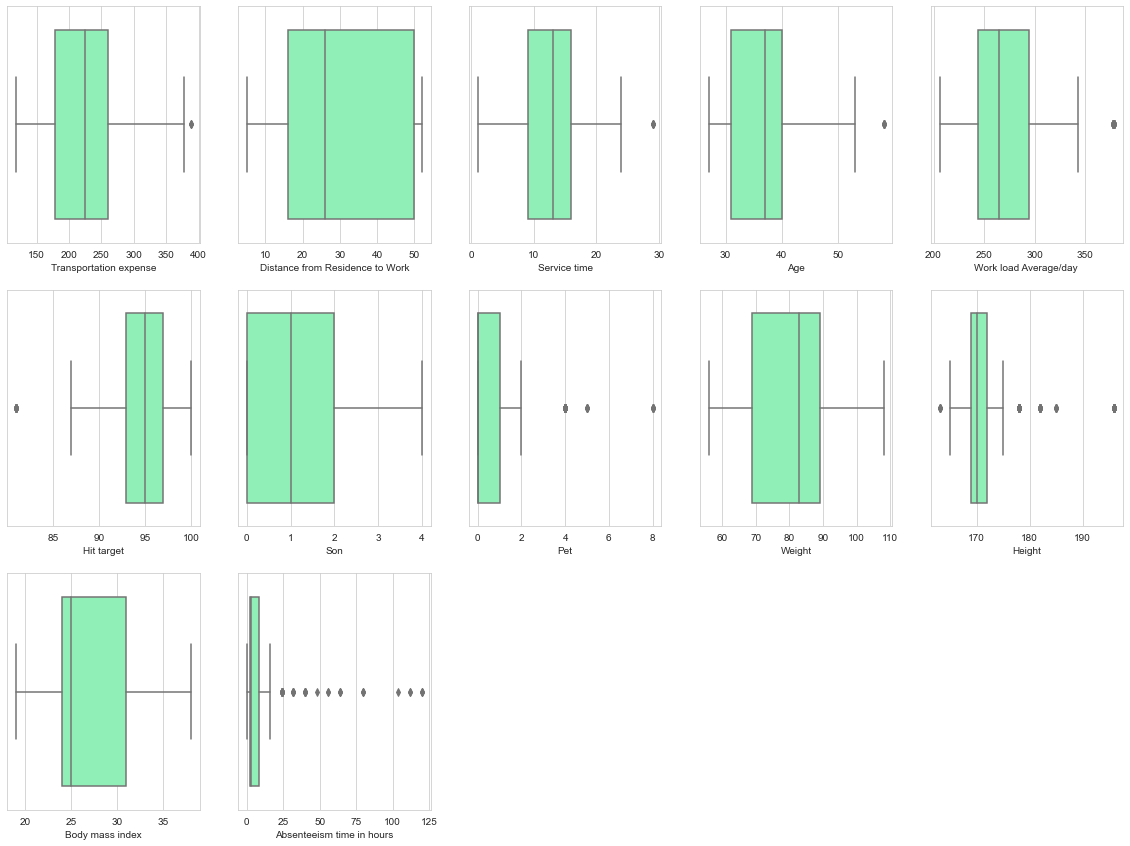

In [12]:
# Mencari Outliers by Boxplot
df_describe = df.drop(columns = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker',
       'Social smoker'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(x=df_describe[column], palette='rainbow')
    x+=1
plt.tight_layout
plt.show()

#### Berdasarkan boxplot di atas dapat dilihat bahwa :
- Transportation expense memiliki 1 nilai outliers
- Service time memiliki 1 nilai outliers
- Age memiliki 1 nilai outliers
- Work load Average/day memiliki 1 nilai outliers
- Hit target memiliki 1 nilai outliers
- Pet memiliki 3 nilai outliers
- Height memiliki 5 nilai outliers
- Absenteeism time in hours memiliki 10 nilai outliers

#### Untuk nilai-nilai outliers diatas tidak dilakukan handling agar tidak mengubah data apapun pada kasus ini.

# Handling Missing Value

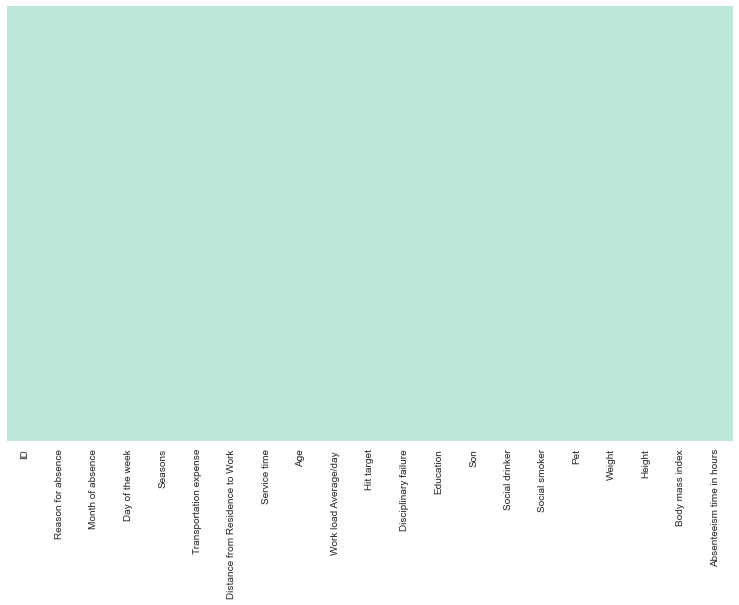

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='icefire')
plt.show()

#### Berdasarkan heatmap diatas, dapat dilihat bahwa tidak ada data yang memiliki nilai Missing Value.

# Handling Data

In [14]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [15]:
df['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [16]:
df = df[df['Month of absence'] != 0]
# Tidak ada Bulan 0, jadi di drop untuk data yang bernilai bulannya = 0

In [17]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,Tuesday,Fall,289,36,13,33,239.554,97,No,High School,2,Yes,No,1,90,172,30,4
1,36,0,7,Tuesday,Fall,118,13,18,50,239.554,97,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,23,7,Wednesday,Fall,179,51,18,38,239.554,97,No,High School,0,Yes,No,0,89,170,31,2
3,7,7,7,Thursday,Fall,279,5,14,39,239.554,97,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,23,7,Thursday,Fall,289,36,13,33,239.554,97,No,High School,2,Yes,No,1,90,172,30,2


In [18]:
num1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
num2 = [22, 23, 24, 25, 26, 27, 28]
num3 = [0]

def reason(x):
    if x in num1:
        return "ICD"
    elif x in num2:
        return "Without ICD"
    elif x in num3:
        return "None"
    
df['Reason'] = df['Reason for absence'].apply(reason)

### Untuk Alasan Without ICD sebenarnya masih bisa ditoleransi, sehingga Karyawan tidak perlu untuk Absen/Tidak Masuk Kerja

In [19]:
def bmi(x):
    if x < 18.5:
        return "Underweight"
    elif 18.5 <= x <= 24.9:
        return "Normal"
    elif 25 <= x <= 29.9:
        return "Overweight"
    elif 30 <= x <= 34.9:
        return "Obesitas 1"
    elif 35 <= x <= 39.9:
        return "Obesitas 2"
    elif x >= 40:
        return "Obesitas Ekstrim"
    
df['BMI'] = df['Body mass index'].apply(bmi)

# Source : https://3.bp.blogspot.com/-MhT_BXSKCkU/Vpj_vwtQJxI/AAAAAAAACCc/9mRue3tdS7Y/s1600/Klasifikasi%2BObesitas%2Bberdasarkan%2BBMI.PNG

In [20]:
df['BMI'].unique()
# Memastikan data sudah ter re-categorize dengan baik

array(['Obesitas 1', 'Normal', 'Overweight', 'Obesitas 2'], dtype=object)

In [21]:
def distance(x):
    if x < 15:
        return "Dekat"
    elif 15 <= x <= 30:
        return "Sedang"
    elif x >= 30:
        return "Jauh"
    
df['Distance'] = df['Distance from Residence to Work'].apply(distance)

In [22]:
df['Distance'].unique()
# Memastikan data sudah ter re-categorize dengan baik

array(['Jauh', 'Dekat', 'Sedang'], dtype=object)

In [23]:
def transport(x):
    if x < 200:
        return "Murah"
    elif 200 <= x <= 300:
        return "Sedang"
    elif x > 300:
        return "Mahal"
    
df['Ongkos'] = df['Transportation expense'].apply(transport)

In [24]:
df['Ongkos'].unique()
# Memastikan data sudah ter re-categorize dengan baik

array(['Sedang', 'Murah', 'Mahal'], dtype=object)

In [25]:
def stress(x):
    if x < 250:
        return "Normal"
    elif 250 <= x <= 300:
        return "Heavy"
    elif x > 300:
        return "Very Heavy"
    
df['Stress'] = df['Work load Average/day '].apply(stress)

In [26]:
df['Stress'].unique()
# Memastikan sudah data sudah ter re-categorize dengan baik

array(['Normal', 'Heavy', 'Very Heavy'], dtype=object)

In [27]:
df = df[df['Reason for absence'] != 0]
# Untuk karyawan yang absen/tidak masuk tanpa alasan di drop, karena kita mencari karyawan yang absen/tidak masuk dengan
# alasan untuk mengetahui berapa lama dia tidak masuknya

# Exploratory Data Analysis

## Univariate

### Persebaran Bulan pada Karyawan yang Tidak Masuk / Absen

In [28]:
pd.crosstab(index=df['Month of absence'], columns='Count')

col_0,Count
Month of absence,
1,50
2,72
3,83
4,52
5,58
6,51
7,65
8,54
9,44


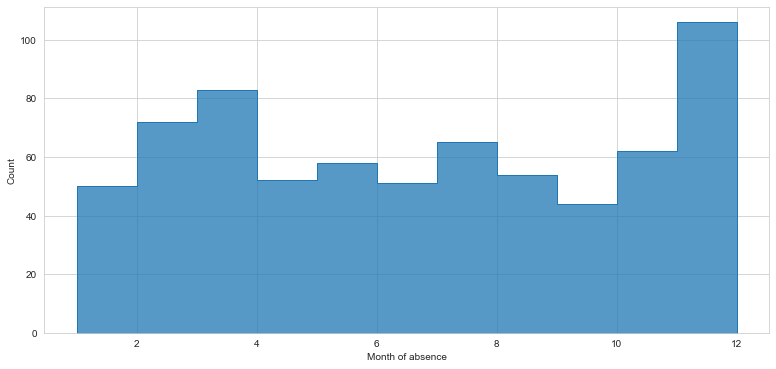

In [29]:
plt.figure(figsize=(13,6))
sns.histplot(x=df['Month of absence'], element='step')
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk pada Bulan **Desember (12)**.

### Persebaran Hari pada Karyawan yang Tidak Masuk / Absen

In [30]:
pd.crosstab(index=df['Day of the week'], columns='Count')

col_0,Count
Day of the week,
Friday,138
Monday,155
Thursday,118
Tuesday,141
Wednesday,145


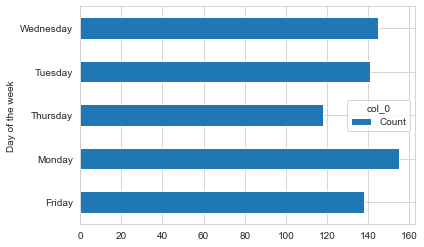

In [31]:
pd.crosstab(index=df['Day of the week'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk pada Hari **Senin (Monday)**.

### Alasan Karyawan Tidak Masuk

In [32]:
pd.crosstab(index=df['Reason'], columns='Count')

col_0,Count
Reason,
ICD,262
Without ICD,435


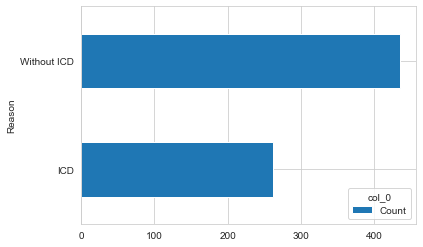

In [33]:
pd.crosstab(index=df['Reason'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Alasan Karyawan yang melakukan Absen/Tidak masuk, dan yang paling banyak pada Kategori **Without ICD**.

### Persebaran Umur pada Karyawan yang Tidak Masuk / Absen

In [34]:
pd.crosstab(index=df['Age'], columns='Count')

col_0,Count
Age,
27,7
28,113
29,6
30,46
31,20
32,12
33,48
34,29
36,44


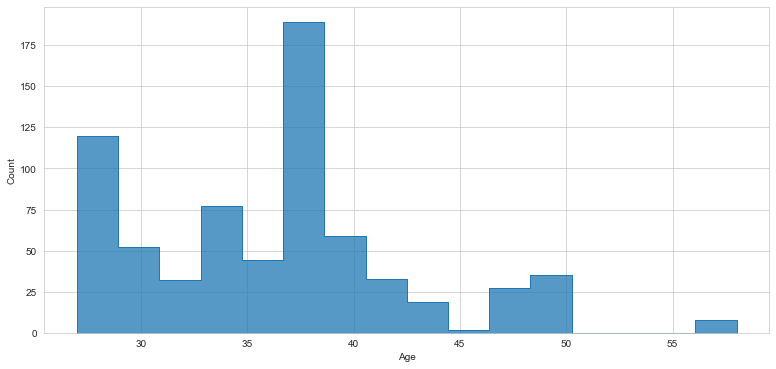

In [35]:
plt.figure(figsize=(13,6))
sns.histplot(x=df['Age'], element='step')
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk yang berumur **37-38 tahun**.

### Absen/Tidak Masuk Berdasarkan Tingkat Pendidikan

In [36]:
pd.crosstab(index=df['Education'], columns='Count')

col_0,Count
Education,
Graduate,43
High School,572
Master and Doctor,4
PostGraduate,78


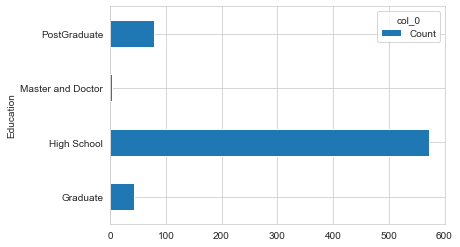

In [37]:
pd.crosstab(index=df['Education'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk yaitu yang berlatar belakang berpendidikan **High School**.

### Absen/Tidak Masuk Berdasarkan Social Smoker

In [38]:
pd.crosstab(index=df['Social smoker'], columns='Count')

col_0,Count
Social smoker,
No,651
Yes,46


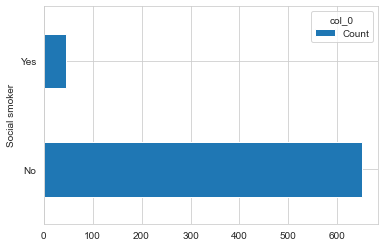

In [39]:
pd.crosstab(index=df['Social smoker'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk yaitu yang **Not a Social Smoker**.

### Absen/Tidak Masuk Berdasarkan Social Drinker

In [40]:
pd.crosstab(index=df['Social drinker'], columns='Count')

col_0,Count
Social drinker,
No,306
Yes,391


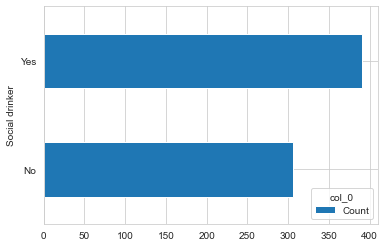

In [41]:
pd.crosstab(index=df['Social drinker'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk yaitu yang **Social Drinker**.

### Absen/Tidak Masuk Berdasarkan BMI

In [42]:
pd.crosstab(index=df['BMI'], columns='Count')

col_0,Count
BMI,
Normal,250
Obesitas 1,205
Obesitas 2,19
Overweight,223


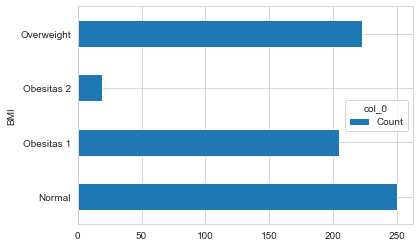

In [43]:
pd.crosstab(index=df['BMI'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, paling banyak Karyawan yang melakukan Absen/Tidak masuk yaitu yang **Normal**.

### Absen/Tidak Masuk Berdasarkan Jumlah Anak

In [44]:
pd.crosstab(index=df['Son'], columns='Count')

col_0,Count
Son,
0,290
1,209
2,146
3,13
4,39


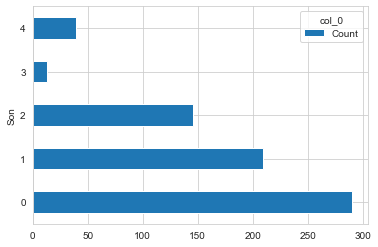

In [45]:
pd.crosstab(index=df['Son'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Jumlah Son **memiliki pengaruh** terhadap Karyawan yang Absen/Tidak Masuk.

### Absen/Tidak Masuk Berdasarkan Distance from Residence to Work

In [46]:
pd.crosstab(index=df['Distance'], columns='Count')

col_0,Count
Distance,
Dekat,148
Jauh,274
Sedang,275


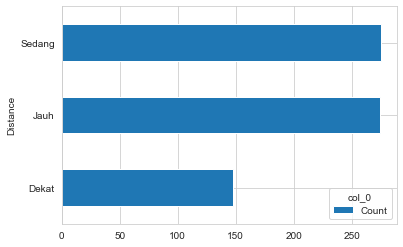

In [47]:
pd.crosstab(index=df['Distance'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan yang **Tinggalnya dekat lebih sedikit** Absen/Tidak Masuk.

### Absen/Tidak Masuk Berdasarkan Ongkos Transportasi

In [48]:
pd.crosstab(index=df['Ongkos'], columns='Count')

col_0,Count
Ongkos,
Mahal,58
Murah,313
Sedang,326


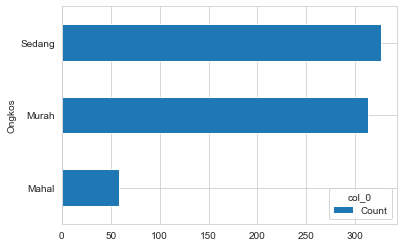

In [49]:
pd.crosstab(index=df['Ongkos'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan yang **Ongkosnya Sedang** paling sedikit Absen/Tidak Masuk.

### Absen/Tidak Masuk Berdasarkan Hit Target

In [50]:
pd.crosstab(index=df['Hit target'], columns='Count')

col_0,Count
Hit target,
81,15
87,12
88,21
91,44
92,70
93,101
94,34
95,71
96,72


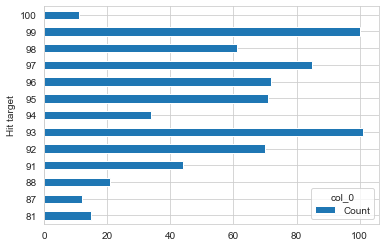

In [51]:
pd.crosstab(index=df['Hit target'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan yang **Hit targetnya 93% dan 99%** paling sering Absen/Tidak Masuk.

### Absen/Tidak Masuk Berdasarkan Absenteeism time in hours

In [52]:
pd.crosstab(index=df['Absenteeism time in hours'], columns='Count')

col_0,Count
Absenteeism time in hours,
0,1
1,88
2,157
3,112
4,60
5,7
7,1
8,208
16,19


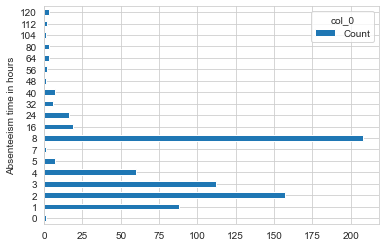

In [53]:
pd.crosstab(index=df['Absenteeism time in hours'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan paling banyak Absen/Tidak masuk selama **8 Jam**.

### Absen/Tidak Masuk Berdasarkan Service Time

In [54]:
pd.crosstab(index=df['Service time'], columns='Count')

col_0,Count
Service time,
1,7
3,24
4,14
6,6
7,7
8,12
9,123
10,55
11,44


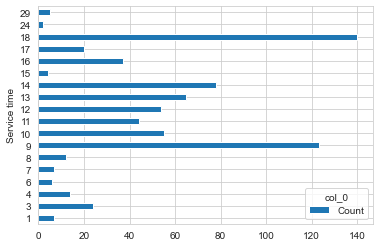

In [55]:
pd.crosstab(index=df['Service time'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan paling banyak Absen/Tidak yang bekerja selama Service time **18 Jam**.

### Absen/Tidak Masuk Berdasarkan Beban Pekerjaan per Hari

In [56]:
pd.crosstab(index=df['Stress'], columns='Count')

col_0,Count
Stress,
Heavy,292
Normal,243
Very Heavy,162


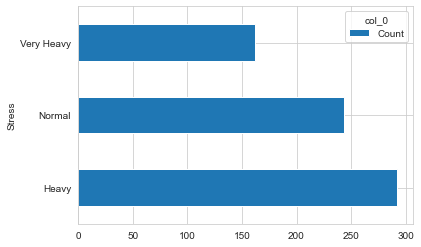

In [57]:
pd.crosstab(index=df['Stress'], columns='Count').plot.barh()
plt.show()

Dapat di lihat berdasarkan data diatas, Karyawan paling banyak Absen/Tidak yang beban pekerjaannya pada golongan **Heavy**.

### Alasan Tiap Karyawan yang Absen/Tidak Masuk dengan Without ICD

In [58]:
withoutICD = df[df['Reason'] == 'Without ICD']

In [59]:
pd.crosstab(index=withoutICD['Reason for absence'], columns='Count')

col_0,Count
Reason for absence,
22,38
23,149
24,3
25,31
26,33
27,69
28,112


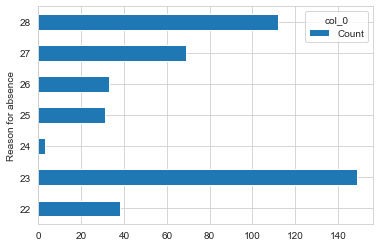

In [60]:
pd.crosstab(index=withoutICD['Reason for absence'], columns='Count').plot.barh()
plt.show()

Reason for Absence dengan Without ICD paling banyak yaitu pada **No 23 yaitu Medical Consultation**.

### Alasan Tiap Karyawan yang Absen/Tidak Masuk dengan ICD

In [61]:
ICD = df[df['Reason'] == 'ICD']

In [62]:
pd.crosstab(index=ICD['Reason for absence'], columns='Count')

col_0,Count
Reason for absence,
1,16
2,1
3,1
4,2
5,3
6,8
7,15
8,6
9,4


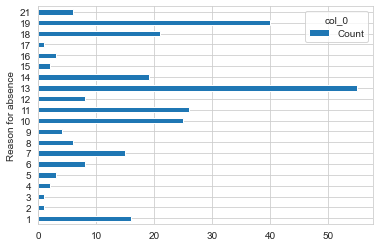

In [63]:
pd.crosstab(index=ICD['Reason for absence'], columns='Count').plot.barh()
plt.show()

Reason for Absence dengan Without ICD paling banyak yaitu pada **No 13 yaitu Diseases of the musculoskeletal system and connective tissue**.

## Multi Variate

### Alasan Tiap Karyawan yang Absen/Tidak Masuk

In [64]:
pd.crosstab(index=df['ID'], columns=df['Reason'])

Reason,ICD,Without ICD
ID,,
1,10,12
2,2,2
3,26,86
5,3,11
6,3,5
7,3,1
9,6,2
10,7,17
11,18,20


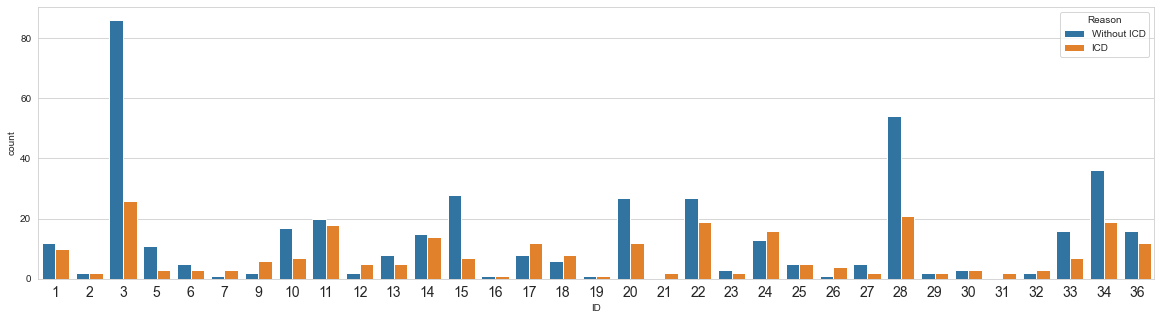

In [65]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['ID'], hue=df['Reason'])
plt.xticks(rotation=0, size=14)
plt.show()

Karyawan paling banyak Absen/Tidak masuk pada **Karyawan No 3, 28, 34**

### Alasan Tiap Karyawan yang Absen/Tidak Masuk

In [66]:
pd.crosstab(index=df['BMI'], columns=df['Reason'])

Reason,ICD,Without ICD
BMI,,
Normal,104,146
Obesitas 1,65,140
Obesitas 2,6,13
Overweight,87,136


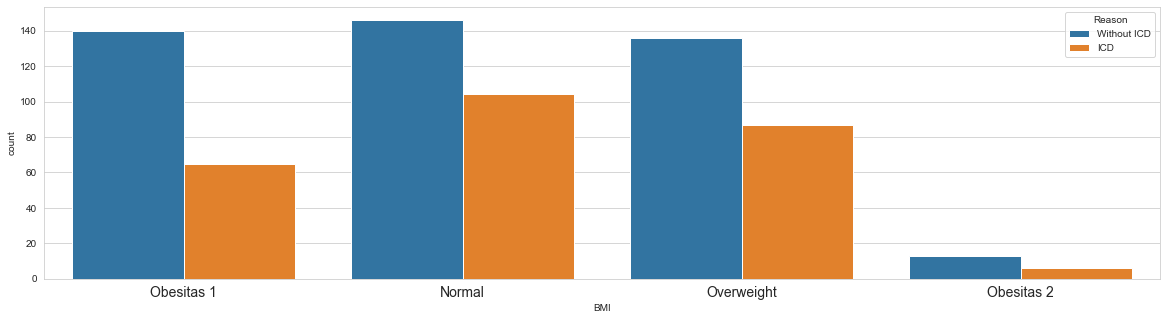

In [67]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['BMI'], hue=df['Reason'])
plt.xticks(rotation=0, size=14)
plt.show()

BMI dari masing-masing karyawan tidak begitu mempengaruhi Alasan Absen/Tidak masuk karena ICD.

# Feature Selection untuk Machine Learning

In [68]:
dfbaru = df.drop(columns=['Reason for absence', 'Seasons', 'Hit target', 'Disciplinary failure', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'BMI','Distance', 'Ongkos', 'Stress'])

In [69]:
dfbaru.reset_index(inplace=True)

In [70]:
clean = dfbaru.drop(columns=['index'])

In [71]:
clean.head()

,ID,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Absenteeism time in hours,Reason
0,11,7,Tuesday,289,36,13,33,239.554,High School,2,Yes,4,Without ICD
1,3,7,Wednesday,179,51,18,38,239.554,High School,0,Yes,2,Without ICD
2,7,7,Thursday,279,5,14,39,239.554,High School,2,Yes,4,ICD
3,11,7,Thursday,289,36,13,33,239.554,High School,2,Yes,2,Without ICD
4,3,7,Friday,179,51,18,38,239.554,High School,0,Yes,2,Without ICD


In [72]:
clean.to_csv('absence_clean.csv')

In [73]:
clean['Reason'].value_counts()/len(clean['Reason'])

Without ICD    0.624103
ICD            0.375897
Name: Reason, dtype: float64

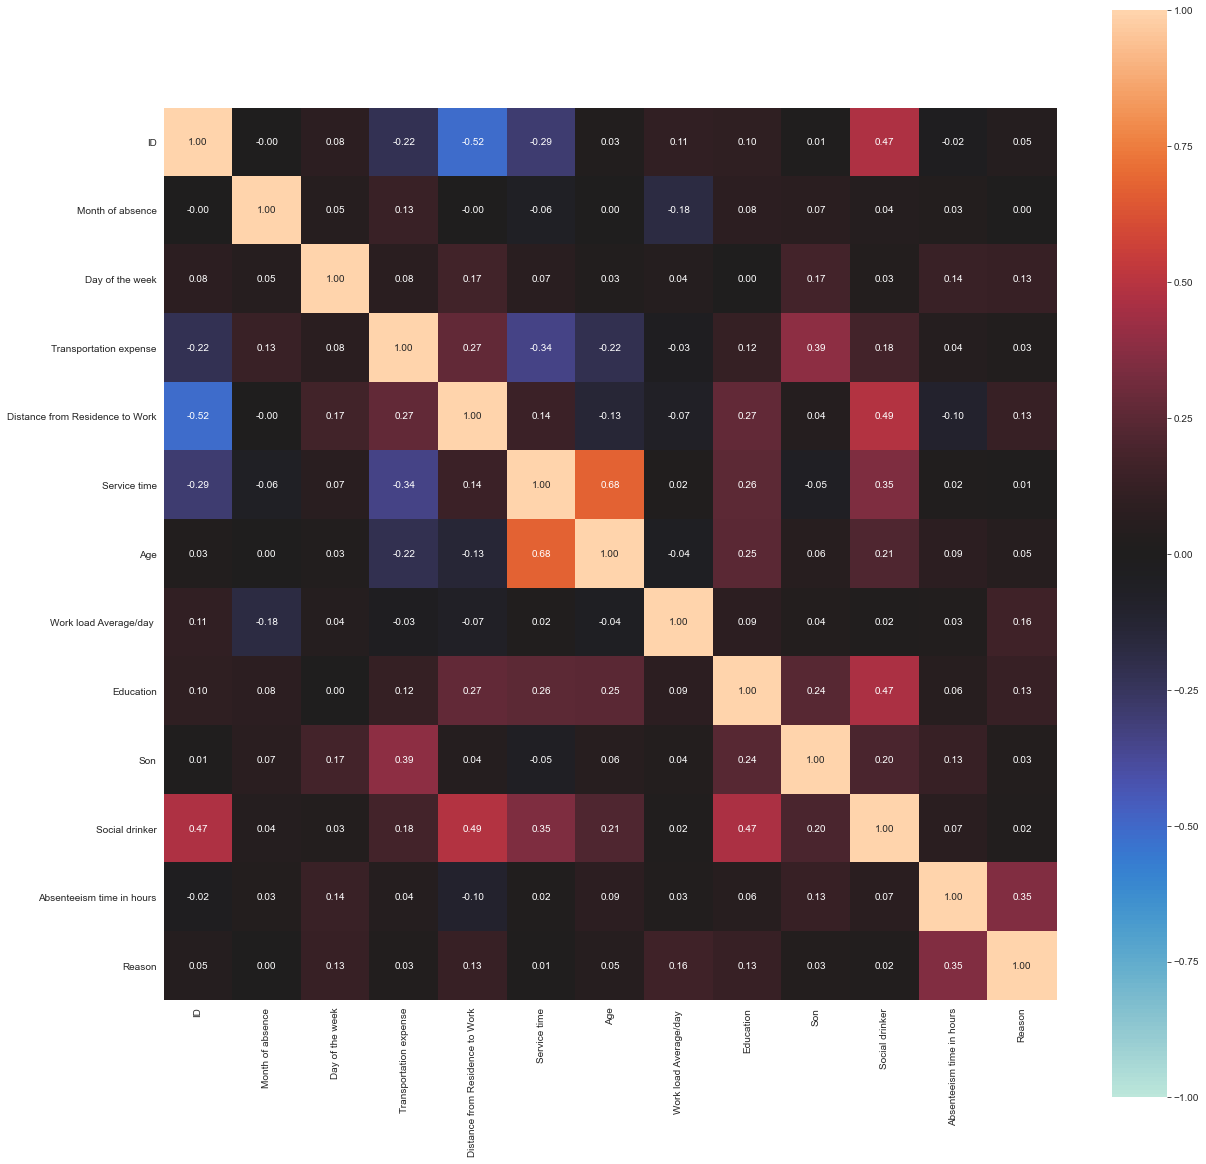

{'corr':                                        ID  Month of absence  Day of the week  \
 ID                               1.000000         -0.001860         0.081173   
 Month of absence                -0.001860          1.000000         0.050457   
 Day of the week                  0.081173          0.050457         1.000000   
 Transportation expense          -0.221176          0.133256         0.075827   
 Distance from Residence to Work -0.515029         -0.002108         0.168552   
 Service time                    -0.293750         -0.059477         0.069189   
 Age                              0.025607          0.002770         0.027799   
 Work load Average/day            0.108428         -0.175411         0.039296   
 Education                        0.096205          0.080504         0.000000   
 Son                              0.008699          0.073189         0.174819   
 Social drinker                   0.471007          0.044892         0.033793   
 Absenteeism time in

In [74]:
associations(clean,figsize=(20,20))